# ASSIGNMENT - 5

# RACHIT AGGARWAL  -  M12506500

## Importing required libraries

In [1]:
from sklearn.datasets import fetch_mldata 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Uploading MNIST dataset

In [2]:
mnist_data = fetch_mldata('MNIST original')
mnist_data.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

## Seperating Features and labels

In [3]:
X, y = mnist_data['data'], mnist_data['target']

## Shuffling the data set

In [4]:
shuffle_indices = np.random.permutation(70000)
X, y = X[shuffle_indices], y[shuffle_indices]  

## Training Random Forest Classifier on 50000 (80%) instances

In [5]:
rand_forest = RandomForestClassifier(n_estimators=500,max_leaf_nodes=50,n_jobs=-1)
rand_forest.fit(X[:50000],y[:50000])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Evaluating the classifier

In [6]:
pred = rand_forest.predict(X[50001:])
accuracy = accuracy_score(pred, y[50001:] )
print('Accuracy of the model: = ' + str(accuracy))

Accuracy of the model: = 0.892344617231


## Plotting the Feature Importance

In [7]:
feature_imp = rand_forest.feature_importances_

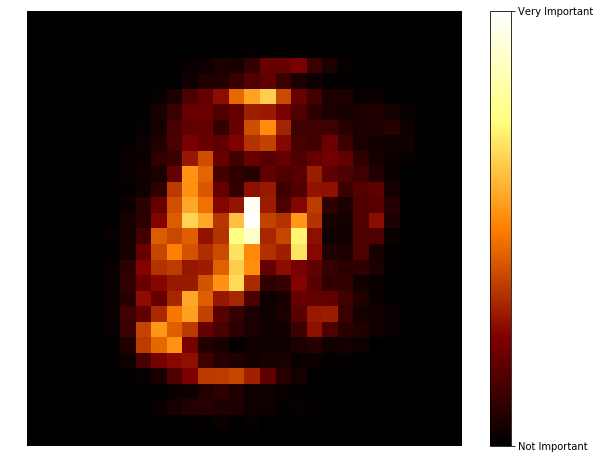

In [18]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(feature_imp.reshape(28, 28), cmap='afmhot')
plt.axis('off')
cbar = plt.colorbar(ticks=[feature_imp.min(), feature_imp.max()])
cbar.ax.set_yticklabels( ['Not Important', 'Very Important'])
plt.show()